# BAX 452 Homework 6

## file name: reviews_electronics.11.json

#### Installing all packages 

In [1]:
#!pip install ijson
#!pip install nltk
import heapq
import json
import io
import ijson
import pandas as pd
import numpy as np
import datetime
import nltk
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import PorterStemmer
nltk.download('stopwords')
from scipy.spatial.distance import pdist
from scipy.spatial.distance import squareform
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
tqdm.pandas()
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, f1_score, precision_score
from sklearn.metrics import r2_score
import statsmodels.formula.api as smf
import heapq
from scipy.sparse import csr_matrix
from scipy import sparse
from sklearn.metrics.pairwise import cosine_similarity

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/nandinibasu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/Users/nandinibasu/opt/anaconda3/lib/python3.7/site-packages/tqdm/std.py:648: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


#### Importing the data

In [2]:
cols = ["reviewerID", "asin", "reviewerName", "helpful_start",
        "helpful_end", "reviewText", "overall", "summary",
        "unixReviewTime", "reviewTime"]

reviewerID = []
asin = []
reviewerName = []
helpful_start = []
helpful_end = []
reviewText = []
overall = []
summary = []
unixReviewTime = []
reviewTime = []
helpful = []

a = datetime.datetime.now()

with open('reviews_electronics.11.json', encoding="UTF-8") as json_file:
    cursor = 0
    for line_number, line in enumerate(json_file):
        #print ("Processing line", line_number + 1,"at cursor index:", cursor)
        line_as_file = io.StringIO(line)
        # Use a new parser for each line
        json_parser = ijson.parse(line_as_file)
        for prefix, type, value in json_parser:
            if (type == 'string') | (type == 'number'):
                if prefix.strip() == 'reviewerID':
                    reviewerID.append(value)
                    #print(value)
                elif prefix.strip() == 'asin':
                    asin.append(value)
                elif prefix.strip() == 'reviewerName':
                    reviewerName.append(value)
                elif prefix.strip() == 'helpful.item':
                    helpful.append(value)
                elif prefix.strip() == 'reviewText':
                    reviewText.append(value)
                elif prefix.strip() == 'overall':
                    overall.append(value)
                elif prefix.strip() == 'summary':
                    summary.append(value)
                elif prefix.strip() == 'unixReviewTime':
                    unixReviewTime.append(value)
                elif prefix.strip() == 'reviewTime':
                    reviewTime.append(value)
        cursor += len(line)

        
b = datetime.datetime.now()
       
helpful_start = [helpful[i] for i in range(len(helpful)) if i%2 == 0]
helpful_end = [helpful[i] for i in range(len(helpful)) if i%2 == 1]

review = pd.DataFrame(list(zip(reviewerID, asin, reviewerName, helpful_start, helpful_end,
                           reviewText, overall, summary, unixReviewTime, reviewTime)),
               columns =cols)
c=b-a
print(c.seconds)

49


In [3]:
review.shape

(492124, 10)

In [4]:
review.head()

,reviewerID,asin,reviewerName,helpful_start,helpful_end,reviewText,overall,summary,unixReviewTime,reviewTime
0,AKM1MP6P0OYPR,0132793040,"Vicki Gibson ""momo4""",1,1,Corey Barker does a great job of explaining Bl...,5.0,Very thorough,1365811200,"04 13, 2013"
1,A3PJZ8TU8FDQ1K,B005I7X3RC,"Jared Castle ""Oregon writer""",1,2,I spend several hours each week walking to wor...,5.0,"My go-to set of headphones for walking, hiking",1401580800,"06 1, 2014"
2,A21ZQZLF1SS6ST,B005I7X3RC,Jarett Stephen Eisenberg,0,0,Very good headphones with nice long lasting ba...,4.0,good for thr price,1376006400,"08 9, 2013"
3,A34FLI599LVU6D,B005I7X3RC,Jay Alan,0,1,I listen to music at work and the gym all the ...,5.0,Pleasantly surprised!,1359244800,"01 27, 2013"
4,A27659NUPI1GAV,B005I7X3RC,Jay,0,0,"Decent range and battery life, acceptable audi...",5.0,Good A2DP headphones for the price,1377216000,"08 23, 2013"


### Quesiton 1
#### Converting to lower case and removing stop words

In [5]:
review["reviewText"] = review["reviewText"].str.lower()

In [6]:
review.head()

,reviewerID,asin,reviewerName,helpful_start,helpful_end,reviewText,overall,summary,unixReviewTime,reviewTime
0,AKM1MP6P0OYPR,0132793040,"Vicki Gibson ""momo4""",1,1,corey barker does a great job of explaining bl...,5.0,Very thorough,1365811200,"04 13, 2013"
1,A3PJZ8TU8FDQ1K,B005I7X3RC,"Jared Castle ""Oregon writer""",1,2,i spend several hours each week walking to wor...,5.0,"My go-to set of headphones for walking, hiking",1401580800,"06 1, 2014"
2,A21ZQZLF1SS6ST,B005I7X3RC,Jarett Stephen Eisenberg,0,0,very good headphones with nice long lasting ba...,4.0,good for thr price,1376006400,"08 9, 2013"
3,A34FLI599LVU6D,B005I7X3RC,Jay Alan,0,1,i listen to music at work and the gym all the ...,5.0,Pleasantly surprised!,1359244800,"01 27, 2013"
4,A27659NUPI1GAV,B005I7X3RC,Jay,0,0,"decent range and battery life, acceptable audi...",5.0,Good A2DP headphones for the price,1377216000,"08 23, 2013"


#### Tokenizing

In [7]:
review["reviewText"] = review["reviewText"].progress_apply(word_tokenize)

100%|██████████| 492124/492124 [04:48<00:00, 1705.52it/s]


#### Converting n't to not

In [8]:
review["reviewText"] = review["reviewText"].progress_apply(lambda x: ' '.join(['not' if a=="n't" else a for a in x]))

100%|██████████| 492124/492124 [00:04<00:00, 103966.42it/s]


#### Removing not from stop words and adding punctuation to list

In [9]:
stop_words_list = stopwords.words('english')
stop_words_list.remove('not')
stop_words_list = stop_words_list+ [",",".",";","$","(",")","..", "...", "?","!", ":","-","]","[", "#"]

#### Function to remove stop words

In [10]:
def clean1(x):
    words = ' '.join([a for a in x.split(' ') if a not in stop_words_list])
    return words

#### Applying function

In [11]:
review['reviewText'] = review['reviewText'].progress_apply(clean1)

100%|██████████| 492124/492124 [01:08<00:00, 7236.70it/s] 


### Question 2
#### Handling negation

In [12]:
review['reviewText'] = review['reviewText'].progress_apply(lambda x: x.replace(' not ', ' not_'))

100%|██████████| 492124/492124 [00:00<00:00, 624754.32it/s]


### Question 3
#### Stemming

In [13]:
ps = PorterStemmer()
# stem_sentence = deepcopy(result)

In [14]:
review['reviewText'] = review['reviewText'].progress_apply(lambda x: ' '.join([ps.stem(a) for a in x.split(' ')]))

100%|██████████| 492124/492124 [07:36<00:00, 1079.17it/s]


### Question 4
#### Creating table of 500 most common words

In [15]:
word_freq = {}
for sentence in review['reviewText']:
    for word in sentence.split(' '):
        if word not in word_freq.keys():
            word_freq[word] = 1
        else:
            word_freq[word] += 1
word_freq

{'corey': 2,
 'barker': 2,
 'great': 165274,
 'job': 15149,
 'explain': 1878,
 'blend': 507,
 'mode': 12281,
 'dvd': 7915,
 'kelbi': 3,
 'train': 1285,
 'video': 34695,
 'pricey': 1282,
 'buy': 59028,
 'individu': 1290,
 'realli': 65952,
 'want': 55463,
 'bang': 1402,
 'buck': 5085,
 'subscrib': 279,
 'onlin': 7253,
 'spend': 8365,
 'sever': 17044,
 'hour': 23400,
 'week': 22151,
 'walk': 3307,
 'work': 212037,
 'hill': 185,
 'near': 3970,
 'home': 18399,
 'besid': 1852,
 'obviou': 1256,
 'health': 155,
 'benefit': 1591,
 'come': 36686,
 'enjoy': 7184,
 'listen': 10733,
 'music': 18284,
 'podcast': 440,
 'crucial': 937,
 'tool': 3573,
 'high': 19884,
 'qualiti': 72804,
 'easy-to-us': 82,
 'set': 48431,
 'bluetooth': 12010,
 'headphon': 24791,
 'arctic': 175,
 'p311': 41,
 'go-to': 144,
 'workouts.th': 4,
 "'s": 183748,
 'might': 13523,
 'comfort': 13046,
 'worn': 1133,
 'light': 38376,
 '2.6': 33,
 'ounc': 195,
 'easili': 20296,
 'sit': 8053,
 'top': 16829,
 'ear': 15078,
 'outsid': 70

#### Creating bag of words

In [16]:
word_vector = heapq.nlargest(500, word_freq, key=word_freq.get)
word_vector

['use',
 'work',
 "'s",
 'one',
 'great',
 'case',
 'would',
 'like',
 'good',
 'product',
 'get',
 'well',
 'time',
 'look',
 'price',
 'kindl',
 'camera',
 'need',
 'qualiti',
 'fit',
 'love',
 'charg',
 'also',
 'batteri',
 '&',
 'purchas',
 'cover',
 'bought',
 'realli',
 'sound',
 'cabl',
 'screen',
 'easi',
 'nice',
 'make',
 'buy',
 'littl',
 'recommend',
 "'m",
 'much',
 'devic',
 'could',
 'back',
 'want',
 'problem',
 'got',
 'go',
 'thing',
 'tri',
 'connect',
 "''",
 'better',
 'even',
 'set',
 'laptop',
 'usb',
 "'ve",
 'new',
 'comput',
 'drive',
 'still',
 'review',
 'first',
 'keyboard',
 'take',
 'power',
 'phone',
 'ipad',
 'tablet',
 'two',
 'plug',
 'protect',
 '2',
 'day',
 'instal',
 'way',
 '``',
 'order',
 '34',
 'light',
 'seem',
 'hold',
 'come',
 'charger',
 'replac',
 'right',
 'unit',
 'say',
 'without',
 'issu',
 'card',
 '--',
 'put',
 'video',
 'tv',
 'color',
 'pictur',
 'fire',
 'keep',
 'item',
 'perfect',
 'amazon',
 'feel',
 'receiv',
 'anoth',
 'ma

#### Function for making document vector

In [17]:
def word_vectors(sentence):
    sent_vec = []
    for word in word_vector:
        if word in sentence.split(' '):
            sent_vec.append(1)
        else:
            sent_vec.append(0)
    return sent_vec

#### Applying function to get document vectors in dataframe

In [18]:
reviews_word_list = list(review["reviewText"].progress_apply(word_vectors))

100%|██████████| 492124/492124 [09:51<00:00, 831.35it/s] 


In [19]:
# Dataframe for Q8
review_df = pd.DataFrame(reviews_word_list,columns = word_vector,index = review["reviewerID"])

In [20]:
# Dataframe for Q10
reviews = pd.DataFrame(reviews_word_list, columns = word_vector)

In [21]:
review["reviewText"] = review["reviewText"].progress_apply(word_vectors)

100%|██████████| 492124/492124 [09:53<00:00, 828.78it/s] 


In [22]:
review.head()

,reviewerID,asin,reviewerName,helpful_start,helpful_end,reviewText,overall,summary,unixReviewTime,reviewTime
0,AKM1MP6P0OYPR,0132793040,"Vicki Gibson ""momo4""",1,1,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",5.0,Very thorough,1365811200,"04 13, 2013"
1,A3PJZ8TU8FDQ1K,B005I7X3RC,"Jared Castle ""Oregon writer""",1,2,"[1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, ...",5.0,"My go-to set of headphones for walking, hiking",1401580800,"06 1, 2014"
2,A21ZQZLF1SS6ST,B005I7X3RC,Jarett Stephen Eisenberg,0,0,"[1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, ...",4.0,good for thr price,1376006400,"08 9, 2013"
3,A34FLI599LVU6D,B005I7X3RC,Jay Alan,0,1,"[1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, ...",5.0,Pleasantly surprised!,1359244800,"01 27, 2013"
4,A27659NUPI1GAV,B005I7X3RC,Jay,0,0,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, ...",5.0,Good A2DP headphones for the price,1377216000,"08 23, 2013"


### Question 5
#### We're using pdist to first calculate the euclidean distance between two reviews and displaying it to the screen using a heat map

In [23]:
reviews_100 = pd.DataFrame()
reviews_100 = pd.DataFrame(review["reviewText"][0:100].values.tolist())

#### Indexing the Reviewer ID

In [24]:
reviews_100["reviewerID"] = review["reviewerID"][0:100]
reviews_100.set_index("reviewerID", inplace = True)

In [25]:
reviews_100.head()

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
reviewerID,,,,,,,,,,,,,,,,,,,,,
AKM1MP6P0OYPR,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A3PJZ8TU8FDQ1K,1,1,1,0,0,0,0,1,1,0,...,0,1,0,0,0,0,0,0,0,0
A21ZQZLF1SS6ST,1,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
A34FLI599LVU6D,1,1,0,0,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
A27659NUPI1GAV,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Using squareform to calculate euclidean distance 

In [26]:
reviews_pairwise = pd.DataFrame(
    squareform(pdist(reviews_100, 'euclidean')),
    columns = reviews_100.index,
    index = reviews_100.index
)

reviews_pairwise

reviewerID,AKM1MP6P0OYPR,A3PJZ8TU8FDQ1K,A21ZQZLF1SS6ST,A34FLI599LVU6D,A27659NUPI1GAV,A3U754IV02BX4L,A36VOKTKWP4NHI,A2WNVG1DM5X3G,A3JVFMFPLL2474,A3BRKZQMRTJBER,...,A2237DFIW1SK2V,A3157VQL40UFLZ,A85QJRAQQXQ92,A12UM97O5GOHS9,A35O82Y2AUETS7,AU32T53STZT74,A2V064AOA46XBX,A1HWCOZAL8QQE0,A1HJOSIQU3W8Z4,A1CAL9DZJER896
reviewerID,,,,,,,,,,,,,,,,,,,,,
AKM1MP6P0OYPR,0.000000,8.000000,5.196152,7.810250,4.795832,8.660254,5.744563,3.741657,4.690416,4.242641,...,4.123106,4.358899,5.291503,3.464102,5.744563,5.291503,7.141428,5.916080,4.795832,5.196152
A3PJZ8TU8FDQ1K,8.000000,0.000000,8.185353,8.306624,7.810250,9.000000,7.937254,7.874008,7.615773,7.745967,...,8.062258,7.937254,8.246211,8.000000,8.544004,8.602325,9.327379,8.544004,8.306624,7.937254
A21ZQZLF1SS6ST,5.196152,8.185353,0.000000,7.348469,5.477226,8.366600,6.000000,5.000000,5.385165,5.385165,...,5.291503,5.291503,6.082763,5.385165,6.480741,5.916080,7.483315,6.480741,5.830952,6.000000
A34FLI599LVU6D,7.810250,8.306624,7.348469,0.000000,7.483315,9.165151,8.000000,7.416198,7.416198,7.681146,...,7.615773,7.874008,8.306624,7.681146,8.485281,8.185353,8.717798,8.124038,8.124038,7.745967
A27659NUPI1GAV,4.795832,7.810250,5.477226,7.483315,0.000000,8.366600,5.830952,4.795832,5.000000,5.000000,...,5.099020,5.291503,6.244998,5.000000,6.324555,6.082763,7.211103,6.324555,5.656854,6.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AU32T53STZT74,5.291503,8.602325,5.916080,8.185353,6.082763,9.110434,6.403124,5.291503,6.324555,5.656854,...,5.385165,5.744563,6.480741,5.099020,6.557439,0.000000,7.937254,6.855655,5.916080,6.403124
A2V064AOA46XBX,7.141428,9.327379,7.483315,8.717798,7.211103,9.486833,8.000000,7.141428,7.549834,7.549834,...,7.071068,7.071068,8.062258,7.280110,8.000000,7.937254,0.000000,7.874008,7.745967,7.874008
A1HWCOZAL8QQE0,5.916080,8.544004,6.480741,8.124038,6.324555,8.485281,6.928203,5.567764,6.708204,6.244998,...,5.656854,6.324555,6.708204,5.916080,7.211103,6.855655,7.874008,0.000000,6.324555,6.633250


#### Heatmap of distance

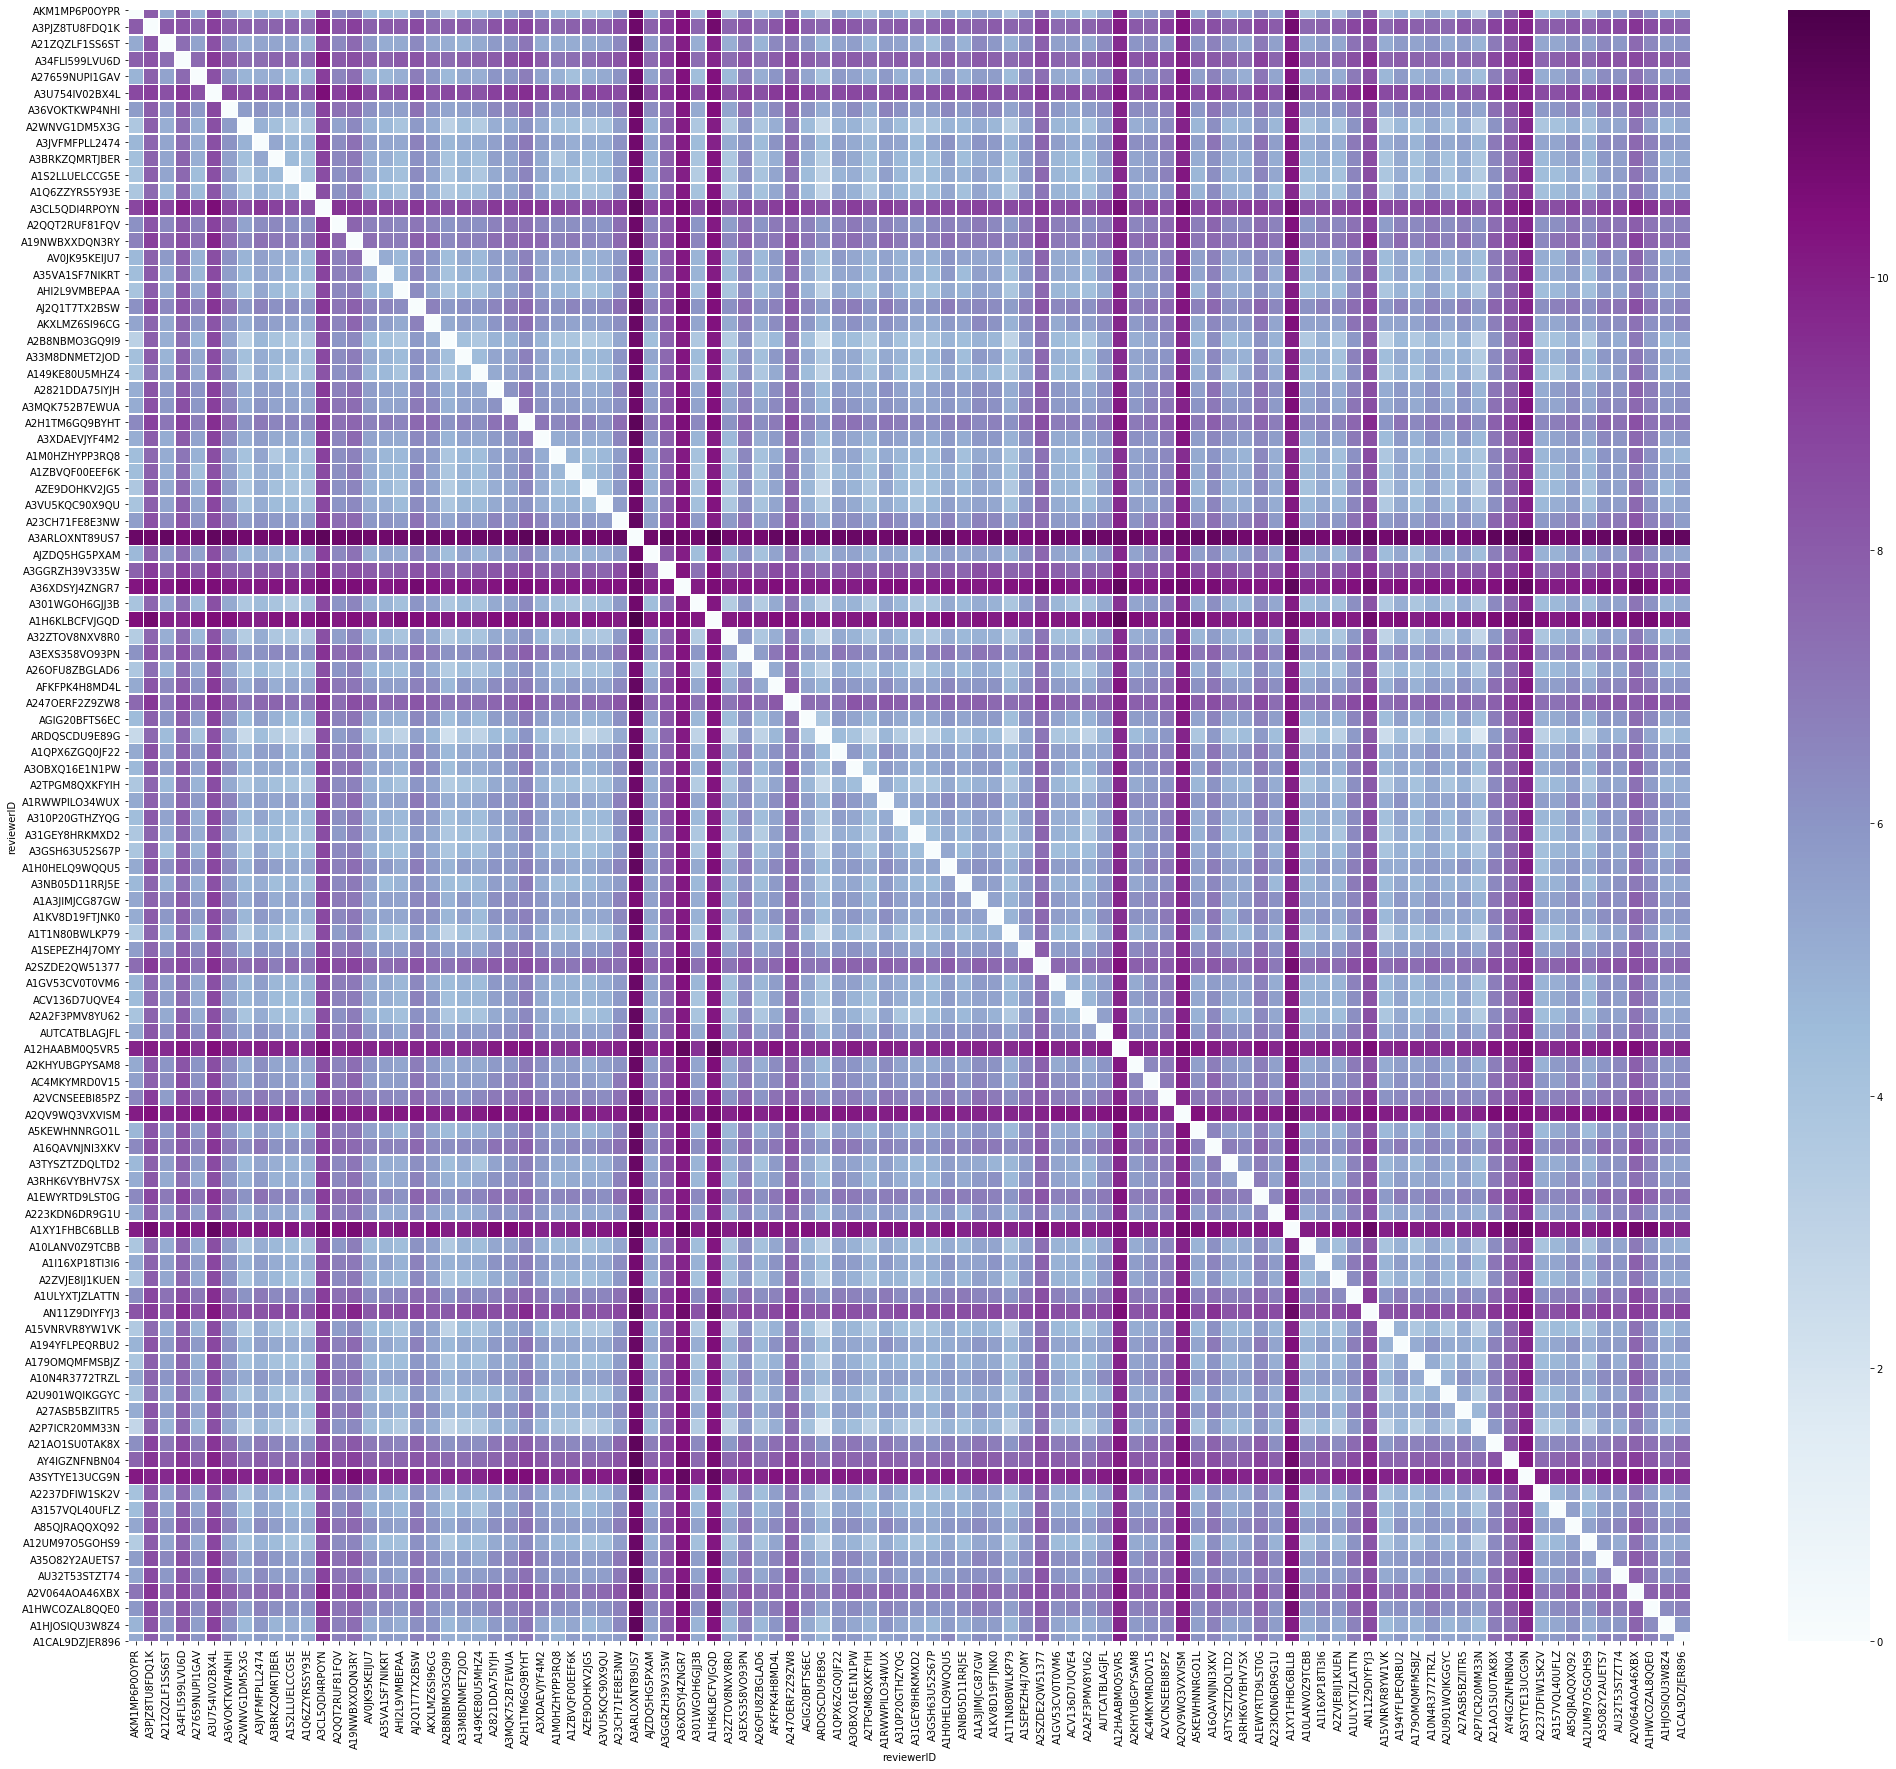

In [27]:
plt.figure(figsize=(35,30))
sns.heatmap(
    reviews_pairwise,
    cmap='BuPu',
    linewidth=.5
)

### Question 6
#### Creating the two principal componants

In [28]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(reviews_100)

In [29]:
reviews_pca = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
reviews_pca['reviewerID'] = review['reviewerID']
reviews_pca.set_index("reviewerID", inplace = True)

In [30]:
reviews_pca.head()

,principal component 1,principal component 2
reviewerID,,
AKM1MP6P0OYPR,-1.550267,-0.403746
A3PJZ8TU8FDQ1K,2.145286,1.155247
A21ZQZLF1SS6ST,-0.089014,0.676125
A34FLI599LVU6D,2.237787,0.996184
A27659NUPI1GAV,-0.737920,0.390527


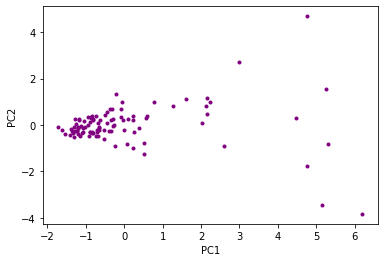

In [31]:
plt.scatter(principalComponents[:,0], principalComponents[:,1], marker='.', color = 'purple')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

##### We can see from the graph that most of the words are not similar as most of the points cluster around 0

### Question 8

#### We split the reviews into two group, one is if its overall score is 5.0, the other is if its overall score is not 5.0.
#### We split the result into five scores.

In [32]:
X = review_df.iloc[:,0:500]

# Change overall into 0 and 1
level_dict = {'5.0':1,'4.0':0,'3.0':0,'2.0':0,'1.0':0}
review['level'] = review['overall'].apply(lambda x: str(x))
review['level'] = review['level'].map(level_dict)
Y = review['level']

# Split data into test and train 
X_train,X_test,y_train,y_test=train_test_split(X,Y, test_size=0.3, random_state=31)

# Do CV Lasso
log = LogisticRegressionCV(Cs=[1000,100,10,1,0.2,0.01], cv=5, 
                           penalty='l1', solver='saga', 
                           max_iter=200, random_state=111, multi_class='ovr') 
log.fit(X_train, y_train)

# Result as 0/1
Y_pred = log.predict(X_test)
print(confusion_matrix(y_test, Y_pred))
print("Accuracy when using 0 and 1 as predicted Y", accuracy_score(y_test, Y_pred))
print("F1 score", f1_score(y_test, Y_pred))
print("Recall", recall_score(y_test, Y_pred))
print("Precision", precision_score(y_test, Y_pred))

# Change result to 0-1
def classify(x):
    if x < 0.2:
        return 1.0
    elif x >= 0.2 and x < 0.4:
        return 2.0
    elif x >=0.4 and x < 0.6:
        return 3.0
    elif x > 0.6 and x <0.8:
        return 4.0
    else:
        return 5.0  

y_pred = log.predict_proba(X_test)
#Transform prediction to different score
Y_pred_score = [classify(i[1]) for i in y_pred]
print("Accuracy when using 0-1 as predicted Y", accuracy_score(y_test, Y_pred_score))

[[41017 21759]
 [13018 71844]]
Accuracy when using 0 and 1 as predicted Y 0.7644441133041628
F1 score 0.8051326590648026
Recall 0.8465980061747307
Precision 0.7675395019390404
Accuracy when using 0-1 as predicted Y 0.013160568417345128


## Question 9

#### We could use "helpful_" columns to help with the aggregation, as the helpfulness of the review could be highly correlated with the ratings of the products. By calculating the "helpful_ratio", helpful_start over helpful_end for each review comment, we could get the helpful weight of each review to adjust the overall word weight of reviews by each product. As the helpful_end of some reviews are 0, we add 1 to each of the helpful_end.

In [33]:
# convert str to int 
for i in range(500):
    reviews.iloc[:,i].apply(lambda x: int(x))
# calculate helpful ratio by review
review['helpful_ratio'] = review['helpful_start']/(review['helpful_end']+1)
reviews = reviews.multiply(review['helpful_ratio'], axis="index")
rev_con = pd.concat([review['asin'], reviews], axis=1)
rev_con.head()

,asin,use,work,'s,one,great,case,would,like,good,...,3d,sit,not_want,simpli,shot,ad,program,channel,surpris,transfer
0,0132793040,0.000000,0.000000,0.000000,0.0,0.5,0.0,0.0,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,B005I7X3RC,0.333333,0.333333,0.333333,0.0,0.0,0.0,0.0,0.333333,0.333333,...,0.0,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,B005I7X3RC,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,B005I7X3RC,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,B005I7X3RC,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
# aggregate helpful ratio by product
prod_vec = rev_con.groupby(['asin']).sum()
prod_vec.head()

,use,work,'s,one,great,case,would,like,good,product,...,3d,sit,not_want,simpli,shot,ad,program,channel,surpris,transfer
asin,,,,,,,,,,,,,,,,,,,,,
0132793040,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
B005I7X3RC,30.422732,34.124655,18.752381,16.166667,23.491597,9.869048,19.966667,21.066209,24.125183,10.616667,...,0.0,2.333333,0.666667,1.633333,0.0,0.0,0.0,0.0,4.883333,0.0
B005I7ZUF0,2.561905,4.228571,1.761905,1.428571,2.261905,0.000000,0.833333,1.800000,1.728571,1.666667,...,0.0,0.000000,0.928571,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
B005I827BO,0.857143,2.190476,0.000000,0.857143,0.857143,0.000000,0.857143,0.500000,0.666667,0.857143,...,0.0,0.000000,0.857143,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
B005I82ZIY,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0


## Question 10

#### We can use euclidean distance to calculate distance between products

In [35]:
prod_pairwise = pd.DataFrame(
    squareform(pdist(prod_vec), 'euclidean'),
    columns = prod_vec.index,
    index = prod_vec.index
)

prod_pairwise

asin,0132793040,B005I7X3RC,B005I7ZUF0,B005I827BO,B005I82ZIY,B005I86YWW,B005I8G92W,B005I8KUEK,B005I8VA94,B005I94IQA,...,B006ULYT6E,B006ULYTRI,B006ULYW2K,B006ULYX5Q,B006ULYZK4,B006ULZ076,B006ULZ0ZS,B006ULZ1O8,B006UMH6VI,B006UMM15O
asin,,,,,,,,,,,,,,,,,,,,,
0132793040,0.000000,150.880117,17.868152,10.192924,1.322876,1.322876,1.322876,12.743876,1.581139,1.322876,...,1.322876,1.322876,1.786057,2.291288,1.322876,1.322876,1.322876,1.322876,1.322876,199.278151
B005I7X3RC,150.880117,0.000000,142.404873,146.611604,151.080996,151.080996,151.080996,144.695837,150.938318,151.080996,...,151.080996,151.080996,150.842793,150.517499,151.080996,151.080996,151.080996,151.080996,151.080996,155.632970
B005I7ZUF0,17.868152,142.404873,0.000000,14.957965,17.962180,17.962180,17.962180,17.475293,17.882138,17.962180,...,17.962180,17.962180,17.852835,17.688896,17.962180,17.962180,17.962180,17.962180,17.962180,190.855576
B005I827BO,10.192924,146.611604,14.957965,0.000000,10.289985,10.289985,10.289985,13.224944,10.249993,10.289985,...,10.289985,10.289985,10.188227,10.178314,10.289985,10.289985,10.289985,10.289985,10.289985,194.663827
B005I82ZIY,1.322876,151.080996,17.962180,10.289985,0.000000,0.000000,0.000000,12.928633,1.322876,0.000000,...,0.000000,0.000000,1.200000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,199.575715
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
B006ULZ076,1.322876,151.080996,17.962180,10.289985,0.000000,0.000000,0.000000,12.928633,1.322876,0.000000,...,0.000000,0.000000,1.200000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,199.575715
B006ULZ0ZS,1.322876,151.080996,17.962180,10.289985,0.000000,0.000000,0.000000,12.928633,1.322876,0.000000,...,0.000000,0.000000,1.200000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,199.575715
B006ULZ1O8,1.322876,151.080996,17.962180,10.289985,0.000000,0.000000,0.000000,12.928633,1.322876,0.000000,...,0.000000,0.000000,1.200000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,199.575715


In [2]:
plt.figure(figsize=(10,10))
sns.heatmap(
    prod_pairwise,
    cmap='BuPu',
    linewidth=1
)

NameError: name 'plt' is not defined